In [9]:
import tkinter as tk
window=tk.Tk() #建立主視窗
window.title("control")
window.geometry('800x550')

#質量m
lm=tk.Label(window,bg='red',width=40,text='m=--')
lm.pack()

def print_selection_m(v) :
    lm.config(text='m='+v)

sm=tk.Scale(window,label='質量m',from_=1,to=10,orient=tk.HORIZONTAL,length=600,showvalue=0,tickinterval=1,resolution=0.01,command=print_selection_m)
sm.pack()

#彈力常數k
lk=tk.Label(window,bg='orange',width=40,text='k=--')
lk.pack()

def print_selection(v) :
    lk.config(text='k='+v)
    
sk=tk.Scale(window,label='彈力常數k',from_=1,to=20,orient=tk.HORIZONTAL,length=600,showvalue=0,tickinterval=2,resolution=0.01,command=print_selection)
sk.pack()

#初始位置x1
lx1=tk.Label(window,bg='yellow',width=40,text='x1=--')
lx1.pack()

def print_selection(v) :
    lx1.config(text='x1='+v)
    
sx1=tk.Scale(window,label='初始位置x1',from_=1,to=20,orient=tk.HORIZONTAL,length=600,showvalue=0,tickinterval=2,resolution=0.01,command=print_selection)
sx1.pack()

#初始位置x2
lx2=tk.Label(window,bg='green',width=40,text='x2=--')
lx2.pack()

def print_selection(v) :
    lx2.config(text='x2='+v)
    
sx2=tk.Scale(window,label='初始位置x2',from_=1,to=20,orient=tk.HORIZONTAL,length=600,showvalue=0,tickinterval=2,resolution=0.01,command=print_selection)
sx2.pack()

#初始速度v1
lv1=tk.Label(window,bg='blue',width=40,text='v1=--')
lv1.pack()

def print_selection(v) :
    lv1.config(text='v1='+v)
    
sv1=tk.Scale(window,label='初始速度v1',from_=1,to=100,orient=tk.HORIZONTAL,length=600,showvalue=0,tickinterval=10,resolution=0.01,command=print_selection)
sv1.pack()

#初始速度v2
lv2=tk.Label(window,bg='purple',width=40,text='v2=--')
lv2.pack()

def print_selection(v) :
    lv2.config(text='v2='+v)
    
sv2=tk.Scale(window,label='初始速度v2',from_=1,to=100,orient=tk.HORIZONTAL,length=600,showvalue=0,tickinterval=10,resolution=0.01,command=print_selection)
sv2.pack()

def show() :
    print("m="+str(sm.get()))
    print("k="+str(sk.get()))
    print("x1="+str(sx1.get()))
    print("x2="+str(sx2.get()))
    print("v1="+str(sv1.get()))
    print("v2="+str(sv2.get()))
    
tk.Button(window, text="return", command=show).pack()

def setting() :
    global m,k,x1,x2,v1,v2
    m=sm.get()
    k=sk.get()
    x1=sx1.get()
    x2=sx2.get()
    v1=sv1.get()
    v2=sv2.get()
    print(m,k,x1,x2,v1,v2)
    
    
tk.Button(window, text="set", command=setting).pack()

window.mainloop() #常駐主視窗

<IPython.core.display.Javascript object>


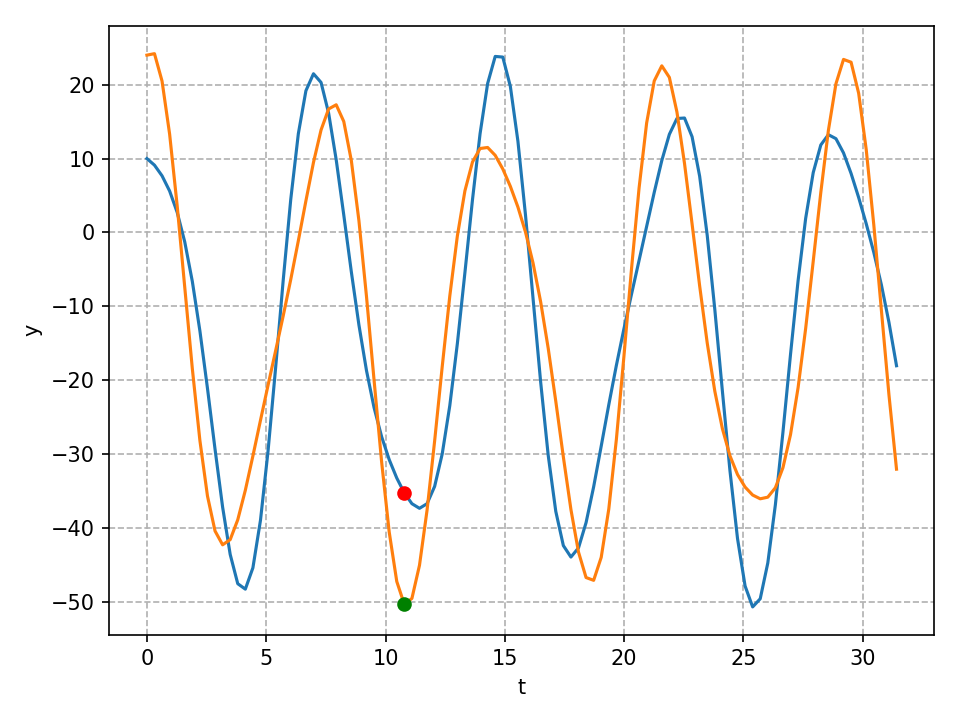

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation


%matplotlib notebook

def update_points(num):
    
    if point_ani.set_data(t[num], y1[num]) :
        return point_ani,
    
    elif point_ani2.set_data(t[num], y2[num]) :
        return point_ani2,


g=9.8
alpha=(k/(2*m))**0.5
j=(-1)**0.5
B1=((x1+x2)/4)+(m*g/k)+(-(v1+v2)/(4*alpha))*j
B2=((x1-x2)/4)+(-(v1-v2)/(4*alpha))*j
bB1=((x1+x2)/4)+(m*g/k)-(-(v1+v2)/(4*alpha))*j
bB2=((x1-x2)/4)-(-(v1-v2)/(4*alpha))*j

t= np.linspace(0, 10*np.pi, 100)
y1 = B1*(np.exp(j*(k/(2*m))**0.5*t))+B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))+bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
y2 = B1*(np.exp(j*(k/(2*m))**0.5*t))-B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))-bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))


fig = plt.figure(tight_layout=True)
#plt.plot(t,y1)
plt.plot(t,y1,t,y2)
plt.xlabel("t")
plt.ylabel("y")
point_ani, = plt.plot(t[0], y1[0], "ro")
#point_ani, = plt.plot(t, y1[0], "ro",t, y2[0], "go")
point_ani2, = plt.plot(t[0], y2[0], "go")

ani = animation.FuncAnimation(fig, update_points, np.arange(0, 100), interval=100, blit=True)



plt.grid(ls="--")


plt.show()

<IPython.core.display.Javascript object>


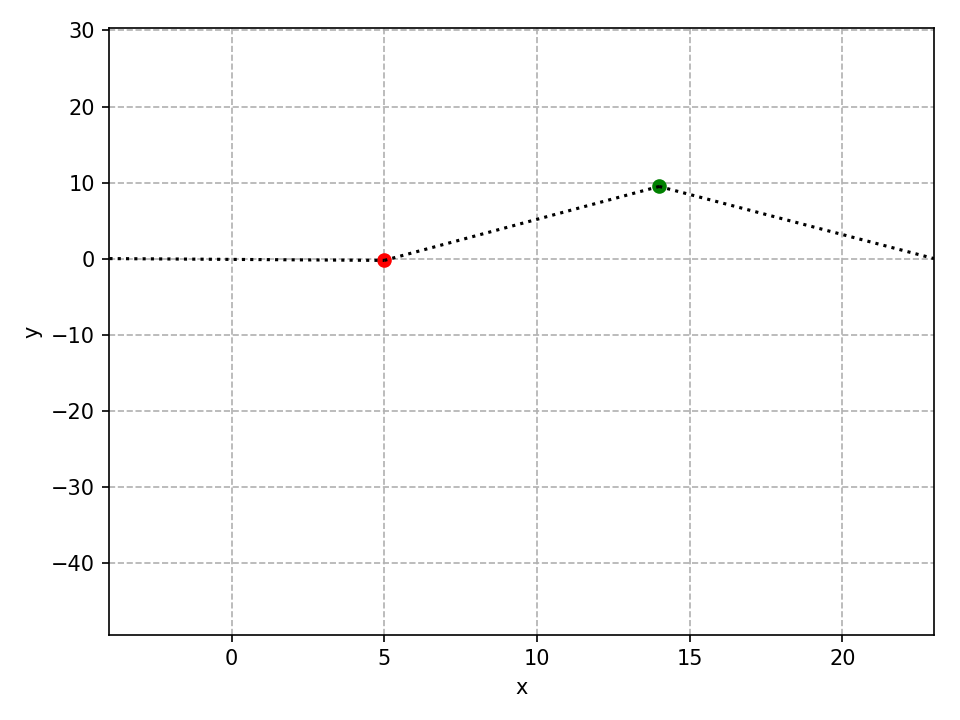

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

def update_points(num):
    
    if point_ani.set_data(x11[num], y1[num]) :
        return point_ani,
        
    elif point_ani2.set_data(x22[num], y2[num]) :
        return point_ani2,
    
    elif line1.set_data([s11[num],s21[num]],[y11[num],y21[num]]) :
        return line1,
    
    elif line2.set_data([s12[num],s22[num]],[y12[num],y22[num]]) :
        return line2,

    elif line3.set_data([s13[num],s23[num]],[y13[num],y23[num]]) :
        return line3,
    
g=9.8
alpha=(k/(2*m))**0.5
x11=[x1]*100
x22=[x2]*100
s1=x1-(x2-x1)
s2=x2+(x2-x1)
s11=[s1]*100
s12=[x1]*100
s13=[x2]*100
s21=[x1]*100
s22=[x2]*100
s23=[s2]*100
j=(-1)**0.5
B1=((x1+x2)/4)+(m*g/k)+(-(v1+v2)/(4*alpha))*j
B2=((x1-x2)/4)+(-(v1-v2)/(4*alpha))*j
bB1=((x1+x2)/4)+(m*g/k)-(-(v1+v2)/(4*alpha))*j
bB2=((x1-x2)/4)-(-(v1-v2)/(4*alpha))*j

t= np.linspace(0, 10*np.pi, 100)
y1 = B1*(np.exp(j*(k/(2*m))**0.5*t))+B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))+bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
y2 = B1*(np.exp(j*(k/(2*m))**0.5*t))-B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))-bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
y11 = [0]*100
y12 = B1*(np.exp(j*(k/(2*m))**0.5*t))+B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))+bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
#y13=y22
y13 = B1*(np.exp(j*(k/(2*m))**0.5*t))-B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))-bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
#y21=y12
y21 = B1*(np.exp(j*(k/(2*m))**0.5*t))+B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))+bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
y22 = B1*(np.exp(j*(k/(2*m))**0.5*t))-B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))-bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
y23 = [0]*100

fig = plt.figure(tight_layout=True)
#plt.plot(x11,y1,x22,y2)
point_ani, = plt.plot(x11[0], y1[0], "ro")
point_ani2, = plt.plot(x22[0], y2[0], "go")

line1, = plt.plot([s11[0],s21[0]],[y11[0],y21[0]],color="black",ls=":")
line2, = plt.plot([s12[0],s22[0]],[y12[0],y22[0]],color="black",ls=":")
line3, = plt.plot([s13[0],s23[0]],[y13[0],y23[0]],color="black",ls=":")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(s1,s2)
ylabel=y1+y2
plt.ylim(min(ylabel.real.tolist())+10,max(ylabel.real.tolist())+10)
#print(min(ylabel.real.tolist()))
#print(max(ylabel.real.tolist()))

plt.grid(ls="--")

ani = animation.FuncAnimation(fig, update_points, np.arange(0, 100), interval=100, blit=True)

plt.show()

<IPython.core.display.Javascript object>


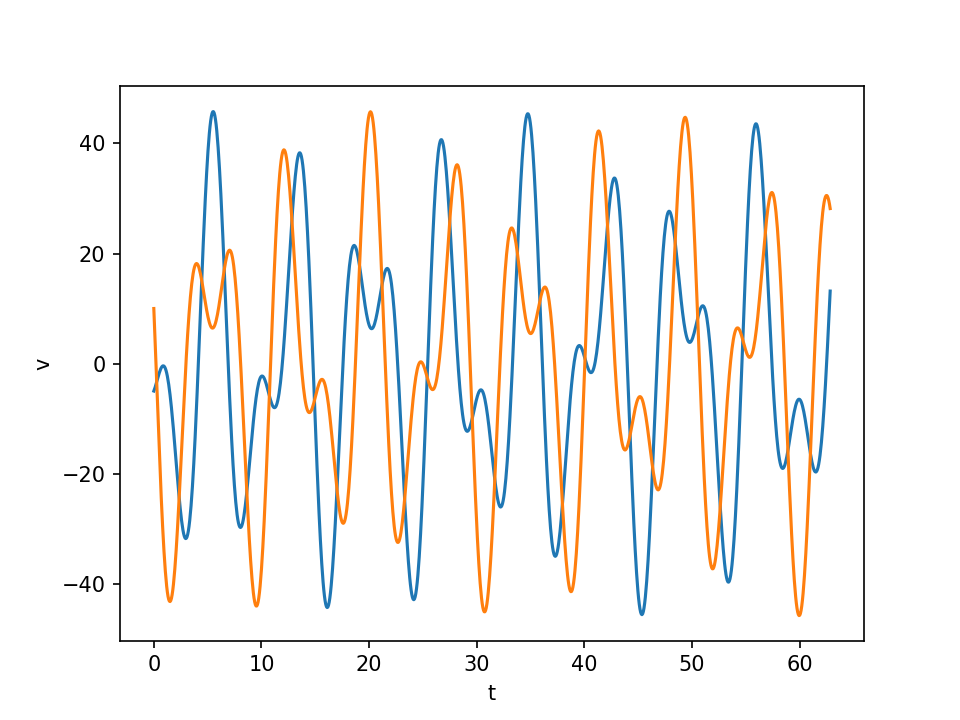

<IPython.core.display.Javascript object>


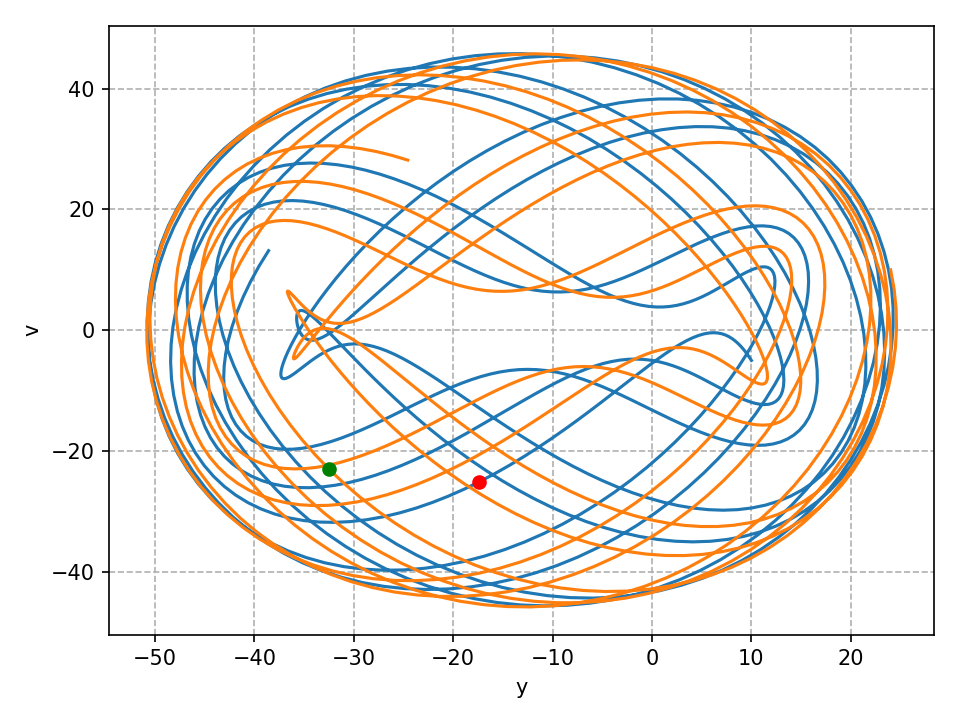

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation


%matplotlib notebook

def update_points(num):
    
    if point_ani.set_data(y1[num], vy1[num]) :
        return point_ani,
    
    elif point_ani2.set_data(y2[num], vy2[num]) :
        return point_ani2,


g=9.8
alpha=(k/(2*m))**0.5
j=(-1)**0.5
B1=((x1+x2)/4)+(m*g/k)+(-(v1+v2)/(4*alpha))*j
B2=((x1-x2)/4)+(-(v1-v2)/(4*alpha))*j
bB1=((x1+x2)/4)+(m*g/k)-(-(v1+v2)/(4*alpha))*j
bB2=((x1-x2)/4)-(-(v1-v2)/(4*alpha))*j

t= np.linspace(0, 20*np.pi, 1000)
y1 = B1*(np.exp(j*(k/(2*m))**0.5*t))+B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))+bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
y2 = B1*(np.exp(j*(k/(2*m))**0.5*t))-B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))-bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
vy1=j*alpha*B1*(np.exp(j*(k/(2*m))**0.5*t))+3*j*alpha*B2*(np.exp(j*(3*k/(2*m))**0.5*t))-j*alpha*bB1*(np.exp(-j*(k/(2*m))**0.5*t))-3*j*alpha*bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
vy2=j*alpha*B1*(np.exp(j*(k/(2*m))**0.5*t))-3*j*alpha*B2*(np.exp(j*(3*k/(2*m))**0.5*t))-j*alpha*bB1*(np.exp(-j*(k/(2*m))**0.5*t))+3*j*alpha*bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
ay1=-alpha**2*B1*(np.exp(j*(k/(2*m))**0.5*t))-9*alpha**2*B2*(np.exp(j*(3*k/(2*m))**0.5*t))-alpha**2*bB1*(np.exp(-j*(k/(2*m))**0.5*t))-9*alpha**2*bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
ay2=-alpha**2*B1*(np.exp(j*(k/(2*m))**0.5*t))+9*alpha**2*B2*(np.exp(j*(3*k/(2*m))**0.5*t))-alpha**2*bB1*(np.exp(-j*(k/(2*m))**0.5*t))+9*alpha**2*bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))

plt.plot(t,vy1,t,vy2)
plt.xlabel("t")
plt.ylabel("v")

fig = plt.figure(tight_layout=True)
plt.plot(y1,vy1,y2,vy2)
plt.xlabel("y")
plt.ylabel("v")
point_ani, = plt.plot(y1[0], vy1[0], "ro")
point_ani2, = plt.plot(y2[0], vy2[0], "go")


ani = animation.FuncAnimation(fig, update_points, np.arange(0, 1000), interval=100, blit=True)


plt.grid(ls="--")

plt.show()

<IPython.core.display.Javascript object>


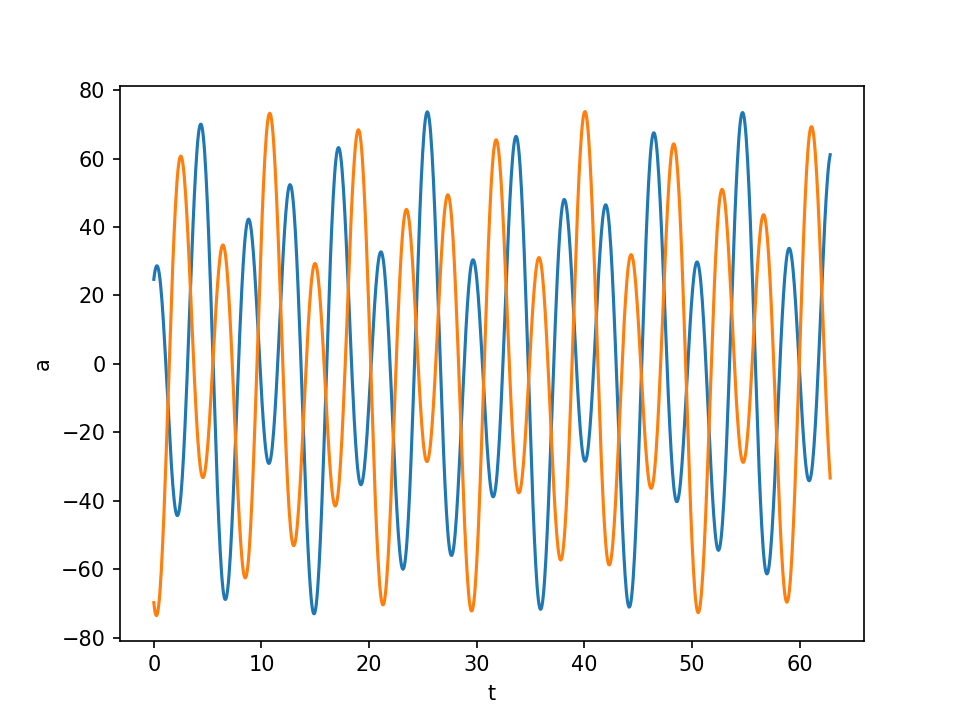

<IPython.core.display.Javascript object>


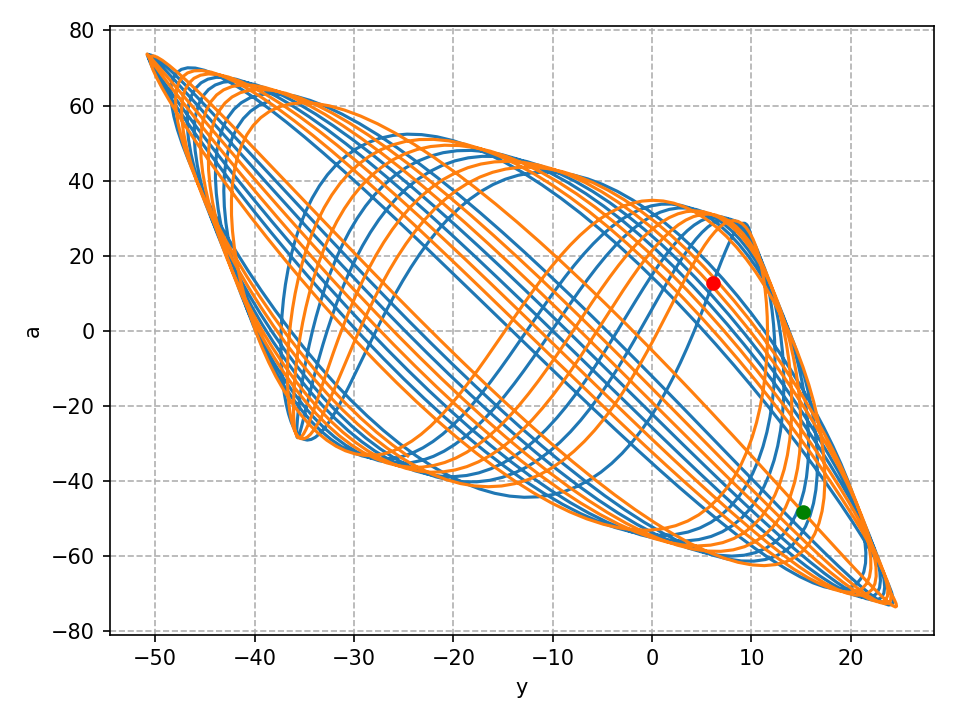

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation


%matplotlib notebook

def update_points(num):
    
    if point_ani.set_data(y1[num], ay1[num]) :
        return point_ani,
    
    elif point_ani2.set_data(y2[num], ay2[num]) :
        return point_ani2,


g=9.8
alpha=(k/(2*m))**0.5
j=(-1)**0.5
B1=((x1+x2)/4)+(m*g/k)+(-(v1+v2)/(4*alpha))*j
B2=((x1-x2)/4)+(-(v1-v2)/(4*alpha))*j
bB1=((x1+x2)/4)+(m*g/k)-(-(v1+v2)/(4*alpha))*j
bB2=((x1-x2)/4)-(-(v1-v2)/(4*alpha))*j

t= np.linspace(0, 20*np.pi, 1000)
y1 = B1*(np.exp(j*(k/(2*m))**0.5*t))+B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))+bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
y2 = B1*(np.exp(j*(k/(2*m))**0.5*t))-B2*(np.exp(j*(3*k/(2*m))**0.5*t))-(2*m*g/k)+bB1*(np.exp(-j*(k/(2*m))**0.5*t))-bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
vy1=j*alpha*B1*(np.exp(j*(k/(2*m))**0.5*t))+3*j*alpha*B2*(np.exp(j*(3*k/(2*m))**0.5*t))-j*alpha*bB1*(np.exp(-j*(k/(2*m))**0.5*t))-3*j*alpha*bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
vy2=j*alpha*B1*(np.exp(j*(k/(2*m))**0.5*t))-3*j*alpha*B2*(np.exp(j*(3*k/(2*m))**0.5*t))-j*alpha*bB1*(np.exp(-j*(k/(2*m))**0.5*t))+3*j*alpha*bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
ay1=-alpha**2*B1*(np.exp(j*(k/(2*m))**0.5*t))-9*alpha**2*B2*(np.exp(j*(3*k/(2*m))**0.5*t))-alpha**2*bB1*(np.exp(-j*(k/(2*m))**0.5*t))-9*alpha**2*bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))
ay2=-alpha**2*B1*(np.exp(j*(k/(2*m))**0.5*t))+9*alpha**2*B2*(np.exp(j*(3*k/(2*m))**0.5*t))-alpha**2*bB1*(np.exp(-j*(k/(2*m))**0.5*t))+9*alpha**2*bB2*(np.exp(-j*(3*k/(2*m))**0.5*t))


plt.plot(t,ay1,t,ay2)
plt.xlabel("t")
plt.ylabel("a")

fig = plt.figure(tight_layout=True)
plt.plot(y1,ay1,y2,ay2)
plt.xlabel("y")
plt.ylabel("a")

point_ani, = plt.plot(y1[0], ay1[0], "ro")
point_ani2, = plt.plot(y2[0], ay2[0], "go")

ani = animation.FuncAnimation(fig, update_points, np.arange(0, 1000), interval=100, blit=True)


plt.grid(ls="--")

plt.show()